In [17]:
import pandas as pd
# 新可转债上市预测
file = 'new_bond.xlsx'
data = pd.read_excel(file)

In [21]:
data.head()

,bondPremRatio,closePriceBond,code,firstDate,remainSize,secShortNameBond,innerValue
0,2.1033,104.180,110041,20180109,18.7522,蒙电转债,102.033921
1,12.0147,112.379,128024,20180112,100.0000,宁行转债,100.325225
2,7.9547,101.760,110042,20180115,24.0000,航电转债,94.261760
3,-0.5855,98.080,113017,20180115,15.6000,吉视转债,98.657640
4,2.8069,124.530,128029,20180116,12.0000,太阳转债,121.130002


In [18]:
data = data.drop('Unnamed: 0',axis=1)

In [19]:
# 转债价格 / （1+溢价率） == 股票价值
data['innerValue'] = data['closePriceBond']/(1+data['bondPremRatio']/100)
X = data['innerValue']
Y=data['closePriceBond']

In [20]:
import numpy as np

# 使用指数拟合
from scipy.optimize import curve_fit
def func(x,a,b):
      # 长段预测     
    return a*np.exp(b/x)

# 任意函数可用作拟合，其他参数都会自动给出
popt,pcov=curve_fit(func,X,Y)

a=popt[0] #popt里面是拟合系数，读者可以自己help其用法

b=popt[1]

zs_yvals=func(X,a,b)

In [24]:
data[data['secShortNameBond']=='银轮转债']

,bondPremRatio,closePriceBond,code,firstDate,remainSize,secShortNameBond,innerValue
457,30.7328,122.6,127037,20210709,7.0,银轮转债,93.779067


In [23]:
func(['innerValue'],a,b)

457    109.05568
Name: innerValue, dtype: float64

<ipython-input-11-e89683eee19e>:7: RuntimeWarning: divide by zero encountered in true_divide
  return a*np.exp(b/x)


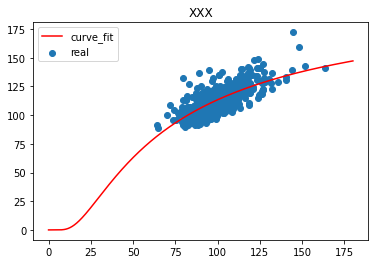

In [16]:
# 绘图
import matplotlib.pyplot as plt
# 数据点与原先的进行画图比较
# 原本点
plt.scatter(X, Y, marker='o',label='real')
# 拟合点
x = np.arange(0, 180, 0.01)
y = func(x,a,b)
plt.plot(x, y,color='red',label='curve_fit')
plt.legend()
plt.title('XXX')
plt.show()